# **Categorical Plots PLOT VISUALISATION**

This secition covers the following categorical plots:
- countplot
- barplot
- boxplot
- violinplot
- stripplot

## Data Cleanup and Preparation

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
file = '/Users/teslim/TeslimWorkSpace/TheData/HoC-GE2024-results-by-constituency.xlsx'

In [54]:
country_gdp = pd.read_excel(file)
country_gdp.head()

,House of Commons General Election 2024 results by constituency,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,[Note 1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ONS ID,ONS region ID,Constituency name,Region name,Country name,Constituency type,Member first name,Member surname,Member gender,Result,...,Green,SNP,PC,DUP,SF,SDLP,UUP,APNI,All other candidates,Of which other winner
2,W07000081,W92000004,Aberafan Maesteg,Wales,Wales,County,Stephen,Kinnock,Male,Lab hold,...,1094,0,4719,0,0,0,0,0,801,0
3,S14000060,S92000003,Aberdeen North,Scotland,Scotland,Burgh,Kirsty,Blackman,Female,SNP hold,...,1275,14533,0,0,0,0,0,0,1269,0
4,S14000061,S92000003,Aberdeen South,Scotland,Scotland,Burgh,Stephen,Flynn,Male,SNP hold,...,1609,15213,0,0,0,0,0,0,648,0


In [31]:
country_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   int64  
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [34]:
# clean the column header
def clean_column_header(df):
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')
    return df

# calling the function
clean_column_header(country_gdp)

,country,year,pop,continent,lifeexp,gdppercap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


In [35]:
country_gdp.columns.to_list()

['country', 'year', 'pop', 'continent', 'lifeexp', 'gdppercap']

In [39]:
numerical_col = country_gdp.select_dtypes(include=['int64', 'float64'])
categorical_col = country_gdp.select_dtypes(exclude=['int64', 'float64'])

In [40]:
categorical_col

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [41]:
numerical_col

,year,pop,lifeexp,gdppercap
0,1952,8425333,28.801,779.445314
1,1957,9240934,30.332,820.853030
2,1962,10267083,31.997,853.100710
3,1967,11537966,34.020,836.197138
4,1972,13079460,36.088,739.981106
...,...,...,...,...
1699,1987,9216418,62.351,706.157306
1700,1992,10704340,60.377,693.420786
1701,1997,11404948,46.809,792.449960
1702,2002,11926563,39.989,672.038623


In [42]:
# clean the column content 
def clean_column_content(row):
    return row.str.lower()

In [43]:
df1 = categorical_col.apply(clean_column_content, axis=1)

In [44]:
data = pd.concat([df1, numerical_col], axis=1)
data.head(10)

,country,continent,year,pop,lifeexp,gdppercap
0,afghanistan,asia,1952,8425333,28.801,779.445314
1,afghanistan,asia,1957,9240934,30.332,820.853030
2,afghanistan,asia,1962,10267083,31.997,853.100710
3,afghanistan,asia,1967,11537966,34.020,836.197138
4,afghanistan,asia,1972,13079460,36.088,739.981106
5,afghanistan,asia,1977,14880372,38.438,786.113360
6,afghanistan,asia,1982,12881816,39.854,978.011439
7,afghanistan,asia,1987,13867957,40.822,852.395945
8,afghanistan,asia,1992,16317921,41.674,649.341395
9,afghanistan,asia,1997,22227415,41.763,635.341351


## 1.  Count Plot

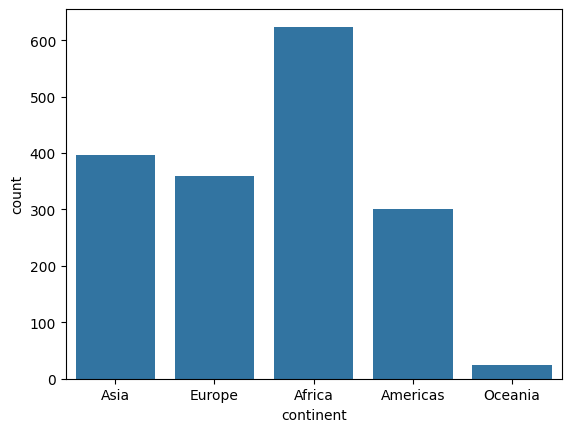

In [47]:
sns.countplot(data=country_gdp, x='continent')
plt.show()

## 2. Count Plot with hue

In [27]:
data.head()

,ons_id,ons_region_id,constituency_name,region_name,country_name,constituency_type,member_first_name,member_surname,member_gender,result,...,green,snp,pc,dup,sf,sdlp,uup,apni,all_other_candidates,of_which_other_winner
0,w07000081,w92000004,aberafan maesteg,wales,wales,county,stephen,kinnock,male,lab hold,...,1094,0,4719,0,0,0,0,0,801,0
1,s14000060,s92000003,aberdeen north,scotland,scotland,burgh,kirsty,blackman,female,snp hold,...,1275,14533,0,0,0,0,0,0,1269,0
2,s14000061,s92000003,aberdeen south,scotland,scotland,burgh,stephen,flynn,male,snp hold,...,1609,15213,0,0,0,0,0,0,648,0
3,s14000062,s92000003,aberdeenshire north and moray east,scotland,scotland,county,seamus,logan,male,snp gain from con,...,0,13455,0,0,0,0,0,0,0,0
4,s14000063,s92000003,airdrie and shotts,scotland,scotland,county,kenneth,stevenson,male,lab gain from snp,...,0,11324,0,0,0,0,0,0,1079,0


<Axes: xlabel='country_name', ylabel='count'>

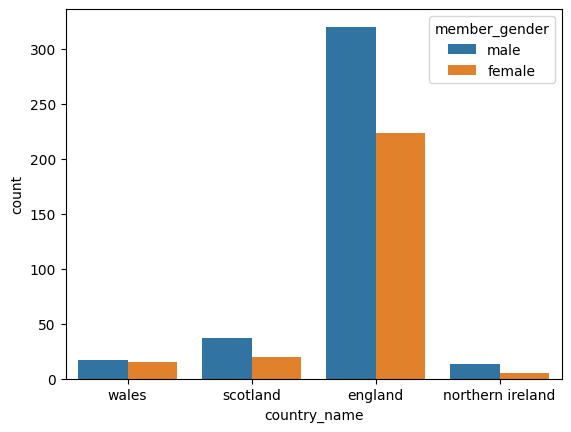

In [28]:
sns.countplot(data=data, x='country_name', hue='member_gender')